In [156]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [157]:
df_train_data = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
df_test_data = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

#### Covert test data from dataframe to Numpy matrices and separate labels from pixels

In [158]:
# First column is the label column
labels = df_test_data.iloc[:,0]
test_labels = labels.as_matrix()
# The first column is the label, not a pixel
pixel_columns = df_test_data.columns[1:]
# Create a numpy array with the DataFrame
test_data = df_test_data.as_matrix(columns=pixel_columns)

#### Do same for train data

In [159]:
# First column is the label column
labels = df_train_data.iloc[:,0]
train_labels = labels.as_matrix()
# The first column is the label, not a pixel
pixel_columns = df_train_data.columns[1:]
# Create a numpy array with the DataFrame
train_data = df_train_data.as_matrix(columns=pixel_columns)

In [160]:
len(train_data[0])

784

In [161]:
# Dictionary with label numbers as keys, label names as values
label_names = { 0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 
               5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot" }

### Looking at the images

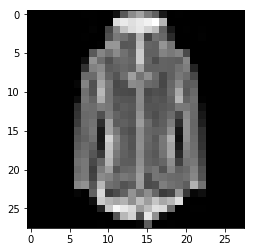

In [162]:
# Show one image at random
plt.imshow(matrix[random.randint(0,60000)].reshape(28,28),cmap=plt.cm.gray)

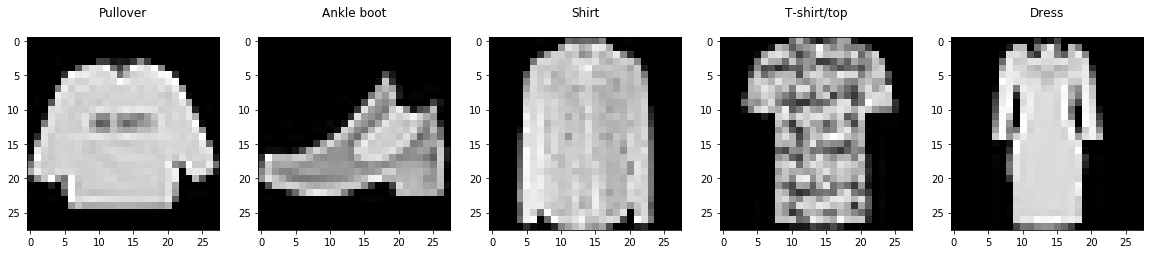

In [163]:
# Show first five images and their labels
plt.figure(figsize=(20,4))
for index, (label, image) in enumerate(zip(train_labels[:5], train_data[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('%s\n' % label_names[label], fontsize = 12)

### Logistic Regression

In [164]:
from sklearn.linear_model import LogisticRegression

In [165]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [166]:
logisticRegr.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [167]:
type(test_data)

numpy.ndarray

In [168]:
# Returns a NumPy Array
test_img = test_data[0]
# Predict for one image
logisticRegr.predict(test_img.reshape(1,-1))

array([0])

In [169]:
predictions = logisticRegr.predict(test_data)

### Measure model performance

I've chosen to use accuracy as the metric to measure model performance. 

Accuracy is defined as: 

    the fraction of correct predictions = correct predictions / total number of data points

In [170]:
score = logisticRegr.score(test_data, test_labels)
print(score)

0.8494


### Display misclassified images with predicted labels

In [171]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_labels, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

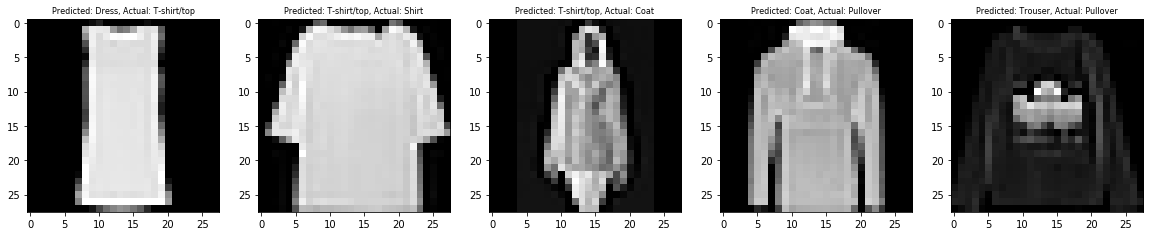

In [172]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[6:11]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_data[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(label_names[predictions[badIndex]], label_names[test_labels[badIndex]]), fontsize = 8)